In [44]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

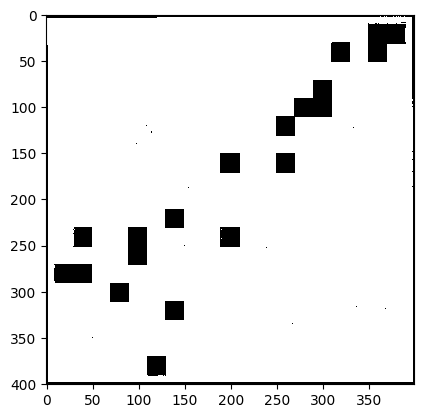

In [45]:
pgmf = open('my_map.pgm', 'rb')
image = plt.imread(pgmf)


image_copia = 1.0 * (image > 250)#mudando os valores de cinza para escala de preto e branco

goal = (250, 125) #define o meu objetivo
robo = (350, 50) #define onde ta meu robo

#para visualização inicial, os dois são pretos
image_copia[goal[0]][goal[1]] = 0 #objetivo é 0
image_copia[robo[0]][robo[1]] = 0 #robo é 0

plt.imshow(image_copia, interpolation='nearest', cmap='gray')
plt.show()

In [46]:
#tentativa 3
image_copia[goal[0]][goal[1]] = 2 #objetivo é 2
image_copia[robo[0]][robo[1]] = 1 #robo é 1

soma = 2
ponto = goal
parar = False
coordenadas = list()

while(1):
    soma += 1
    for l in range (-1,2):
        for c in range (-1,2):
           #print(c, l)
            try:
                if(image_copia[ponto[0]+l][ponto[1]+c] == 1):
                    image_copia[ponto[0]+ l][ponto[1]+c]= soma
                    coordenadas.append([ponto[0]+ l, ponto[1]+c])

                if(ponto[0]+l == robo[0] and ponto[1]+c == robo[1]):
                    parar = True
                    break
                #print(ponto[0]+l, ponto[1]+c)
            except: 
                continue
        if(parar == True):
           break   
    if(parar == True):
           break   
            
    ponto = coordenadas.pop(0)

249 149
249 150
249 151
250 149
250 150
250 151
251 149
251 150
251 151
248 148
248 149
248 150
249 148
249 149
249 150
250 148
250 149
250 150
248 149
248 150
248 151
249 149
249 150
249 151
250 149
250 150
250 151
248 150
248 151
248 152
249 150
249 151
249 152
250 150
250 151
250 152
249 148
249 149
249 150
250 148
250 149
250 150
251 148
251 149
251 150
249 150
249 151
249 152
250 150
250 151
250 152
251 150
251 151
251 152
250 148
250 149
250 150
251 148
251 149
251 150
252 148
252 149
252 150
250 149
250 150
250 151
251 149
251 150
251 151
252 149
252 150
252 151
250 150
250 151
250 152
251 150
251 151
251 152
252 150
252 151
252 152
247 147
247 148
247 149
248 147
248 148
248 149
249 147
249 148
249 149
247 148
247 149
247 150
248 148
248 149
248 150
249 148
249 149
249 150
247 149
247 150
247 151
248 149
248 150
248 151
249 149
249 150
249 151
248 147
248 148
248 149
249 147
249 148
249 149
250 147
250 148
250 149
249 147
249 148
249 149
250 147
250 148
250 149
251 147
251 148


 137
236 138
237 136
237 137
237 138
238 136
238 137
238 138
236 137
236 138
236 139
237 137
237 138
237 139
238 137
238 138
238 139
236 138
236 139
236 140
237 138
237 139
237 140
238 138
238 139
238 140
237 136
237 137
237 138
238 136
238 137
238 138
239 136
239 137
239 138
238 136
238 137
238 138
239 136
239 137
239 138
240 136
240 137
240 138
236 139
236 140
236 141
237 139
237 140
237 141
238 139
238 140
238 141
236 140
236 141
236 142
237 140
237 141
237 142
238 140
238 141
238 142
239 136
239 137
239 138
240 136
240 137
240 138
241 136
241 137
241 138
240 136
240 137
240 138
241 136
241 137
241 138
242 136
242 137
242 138
236 141
236 142
236 143
237 141
237 142
237 143
238 141
238 142
238 143
236 142
236 143
236 144
237 142
237 143
237 144
238 142
238 143
238 144
241 136
241 137
241 138
242 136
242 137
242 138
243 136
243 137
243 138
242 136
242 137
242 138
243 136
243 137
243 138
244 136
244 137
244 138
236 143
236 144
236 145
237 143
237 144
237 145
238 143
238 144
238 145
236

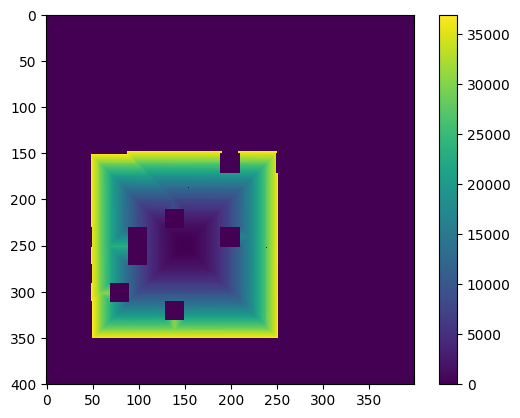

In [47]:
plt.imshow(image_copia, interpolation='nearest', cmap='viridis')  # Usando viridis para ver os valores
plt.colorbar()
plt.show()

In [48]:
ponto_inicial = robo
caminho = [robo]
menor = image_copia[robo[0]][robo[1]] + 1
menor_posicao = robo
parar = False

while(1):

    for l in range (1,-2,-1):
        for c in range (1,-2,-1):
            try:
                if(image_copia[ponto_inicial[0]+l][ponto_inicial[1]+c] > 1 and image_copia[ponto_inicial[0]+l][ponto_inicial[1]+c] < menor):
                    #print("posicao: " , (menor_posicao[0]+l,menor_posicao[1]+c), "menor posicao ", menor_posicao, " valor ", image_copia[menor_posicao[0]+l][menor_posicao[1]+c], "menor valor ", menor)
                    #print(menor)
                    
                    menor = image_copia[ponto_inicial[0]+l][ponto_inicial[1]+c]
                    menor_posicao = (ponto_inicial[0]+l, ponto_inicial[1]+c)

                if(ponto_inicial[0]+l == goal[0] and ponto_inicial[1]+c == goal[1]):
                    parar = True
                    break
                # print(menor_posicao[0]+l, menor_posicao[1]+c)
            except: 
                continue

        if(parar == True):
            break 

    ponto_inicial = menor_posicao
    #print("parou quadrado")
    caminho.append(menor_posicao)

    if(parar == True):
        break 

In [49]:
print(caminho)

[[350, 50], (349, 51), (348, 52), (347, 53), (346, 54), (345, 55), (344, 56), (343, 57), (342, 58), (341, 59), (340, 60), (339, 61), (338, 62), (337, 63), (336, 64), (335, 65), (334, 66), (333, 67), (332, 68), (331, 69), (330, 70), (329, 71), (328, 72), (327, 73), (326, 74), (325, 75), (324, 76), (323, 77), (322, 78), (321, 79), (320, 80), (319, 81), (318, 82), (317, 83), (316, 84), (315, 85), (314, 86), (313, 87), (313, 88), (312, 89), (311, 90), (310, 91), (309, 92), (308, 93), (307, 94), (306, 95), (305, 96), (304, 97), (303, 98), (302, 99), (301, 100), (300, 101), (299, 102), (298, 103), (297, 104), (296, 105), (295, 106), (294, 107), (293, 108), (292, 109), (291, 110), (290, 111), (289, 112), (288, 113), (287, 114), (286, 115), (285, 116), (284, 117), (283, 118), (282, 119), (281, 120), (280, 121), (279, 122), (278, 123), (277, 124), (276, 125), (275, 126), (274, 127), (273, 128), (272, 129), (271, 130), (270, 131), (269, 132), (268, 133), (267, 134), (266, 135), (265, 136), (264,

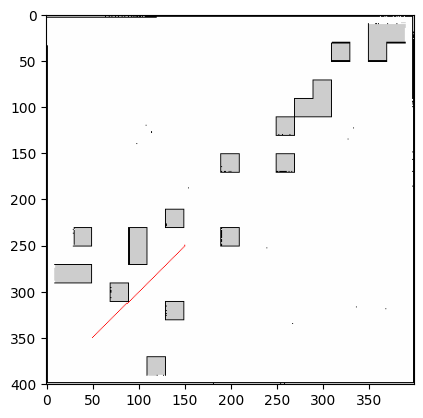

In [50]:
#colorindo caminho :)

image_com_caminho = image.copy()
image_com_caminho = cv2.cvtColor(image_com_caminho, cv2.COLOR_GRAY2RGB)

for i in caminho:

    image_com_caminho[i[0]][i[1]] = [254, 0, 0]

plt.imshow(image_com_caminho)



In [51]:
# image_copia[goal[0]][goal[1]] = 2  #objetivo começa em 2

# numeros = [goal] #lista para armazenar as coordenadas
# valores = [] #lista para armazenas as coordenadas e seus valores

# direcoes = [(-1, 0), (1, 0), (0, -1), (0, 1)] #faz ele ir pra cima

# #função para não acessar valores inexistentes
# def pixel_valido(x,y,image):
#     try: 
#         if(image[x][y] ==1):
#             return True
#         else:
#             return False
#     except:
#         pass

# while(numeros):
#     x, y = numeros.pop(0) #para sempre tirar o elemento da lista e colocar na variável
#     valor_atual = image_copia[x][y]

#     valores.append((x, y, valor_atual))
    
#     for dx, dy in direcoes:
#         new_x, new_y = x + dx, y + dy  # Coordenadas da nova célula
#         if pixel_valido(new_x, new_y, image_copia):  # Verifica se a célula é válida
#             image_copia[new_x][new_y] = valor_atual + 1  # Aumenta o valor
#             numeros.append((new_x, new_y))  # Adiciona a nova célula à fila para processar depois

# plt.imshow(image_copia, interpolation='nearest', cmap='viridis')  # Usando viridis para ver os valores
# plt.colorbar()
# plt.show()


# for item in valores:
#     print(f"Posição: ({item[0]}, {item[1]}), Valor: {item[2]}")

In [52]:
#Essa foi a tentativa 1, falhou porque demora muito e crashar ;)
    #for l in range (-(soma-2),soma-1, 1):
    #    for c in range (-(soma-2),soma-1,1):
    #        #print(c, l)
    #        try:
    #            if(image_copia[goal[0]+l][goal[1]+c] == 1):
    #                image_copia[goal[0]+ l][goal[1]+c]= soma
    #            if(goal[0]+l == robo[0] and goal[1]+c == robo[1]):
    #                break
    #            print(goal[0]+l, goal[1]+c)
    #        except: 
    #            continue

In [53]:
image_copia.shape

(401, 399)

In [54]:
#tentativa dois, também deu errado porque ele faz um quadrado, e não necessáriamente sempre vai ser um quadrado 
# while(1):
#     soma += 1
#     for c in range (-(soma-2),soma-1, 1):
#         try:
#             if(image_copia[goal[0]+(-(soma-2))][goal[1]+c] == 1):
#                 image_copia[goal[0]+ (-(soma-2))][goal[1]+c]= soma
#             if(goal[0]+(-(soma-2)) == robo[0] and goal[1]+c == robo[1]):
#                 print(goal[0]+(soma-1), goal[1]+c)
#                 parar = True
#                 break
#         except: 
#             pass

#     for c in range (-(soma-2),soma-1, 1):
#         try:
#             if(image_copia[goal[0]+(soma-1)][goal[1]+c] == 1):
#                 image_copia[goal[0]+ (soma-1)][goal[1]+c]= soma
#             if(goal[0]+(soma-1) == robo[0] and goal[1]+c == robo[1]):
#                 print(goal[0]+(soma-1), goal[1]+c)
#                 parar = True
#                 break
#         except: 
#             pass
    
#     for l in range (-(soma-2),soma-1, 1):
#         try:
#             if(image_copia[goal[0]+l][goal[1]+(-(soma-2))] == 1):
#                 image_copia[goal[0]+ l][goal[1]+(-(soma-2))]= soma
#             if(goal[0]+l == robo[0] and goal[1]+(-(soma-2)) == robo[1]):
#                 print(goal[0]+l, goal[1]+(-(soma-2)))
#                 parar = True
#                 break
            
#         except: 
#             pass

#     for l in range (-(soma-2),soma-1, 1):
#         try:
#             if(image_copia[goal[0]+l][goal[1]+(soma-1)] == 1):
#                 image_copia[goal[0]+ l][goal[1]+(soma-1)]= soma
#             if(goal[0]+l == robo[0] and goal[1]+(soma-1) == robo[1]):
#                 print(goal[0]+l, goal[1]+(soma-1))
#                 parar = True
#                 break
            
#         except: 
#             pass

#     if parar:
#         break

(401, 399, 3)

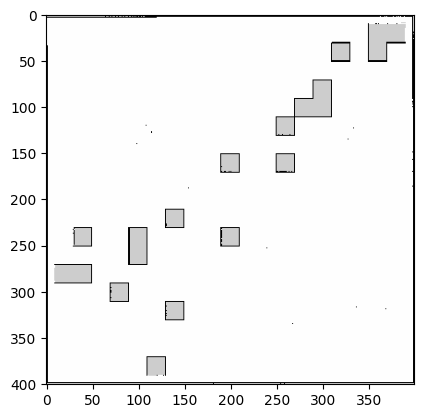

In [55]:
#teste de outra biblioteca
img = cv2.imread("my_map.pgm")
plt.imshow(img)
img.shape